In [1]:
# from https://cospar.readthedocs.io/en/latest/20210121_all_hematopoietic_data_v3.html
import cospar as cs
import numpy as np
import anndata as ad

In [2]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup4/Writeup4_cospar-LARRY.h5ad")
adata

AnnData object with n_obs × n_vars = 41093 × 2000
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'Time point', 'clone_id', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'clonal_time_points', 'data_des', 'hvg', 'intraclone_transition_map', 'log1p', 'neighbors', 'pca', 'sp_idx', 'time_ordering', 'transition_map'
    obsm: 'X_clone', 'X_emb', 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [15]:
adata.obs['Time point']

d6_2_2:GCGTGCAAAGAAGTTA        6
d6_2_2:AAGGGACCCTCGATGC        6
d6_2_2:CGTACCGAAGCGCCTT        6
d6_2_2:CCGTAGCTAGGCAGTT        6
d6_2_2:TAGGCTTTCGTGGATA        6
                              ..
LSK_d6_1_3:CTGTGACCTGCTATTT    6
LSK_d6_1_3:AGGCGTTTCCTATTCA    6
LSK_d6_1_3:CGTGCAACTGGCCTGT    6
LSK_d6_1_3:CCCTTGCAAGTGAAAG    6
LSK_d6_1_3:TCCGCTGTGACAGATA    6
Name: Time point, Length: 41093, dtype: int64

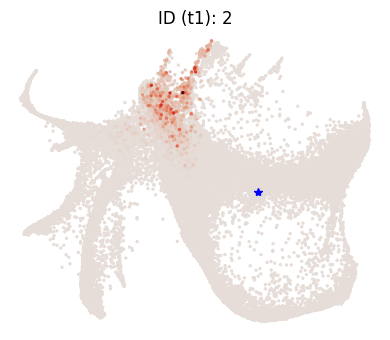

In [13]:
selected_state_id_list = [2]

cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    color_bar=False,
    source="transition_map",
    map_backward=False,
)

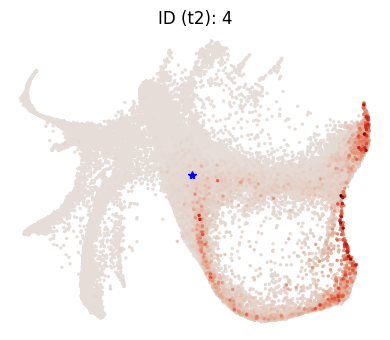

In [14]:
selected_state_id_list = [4]
cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    color_bar=False,
    source="transition_map",
    map_backward=True,
)

/home/users/kzlin/miniconda3/envs/cospar/lib/python3.9/site-packages/cospar/tool/_utils.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_annote[cell_id_t2] == yy


Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']


FileNotFoundError: [Errno 2] No such file or directory: 'figure/LARRY_MultiTimeClone_Later_FullSpace0_t*4*6*2_fate_map_transition_map_Neutrophil.pdf'

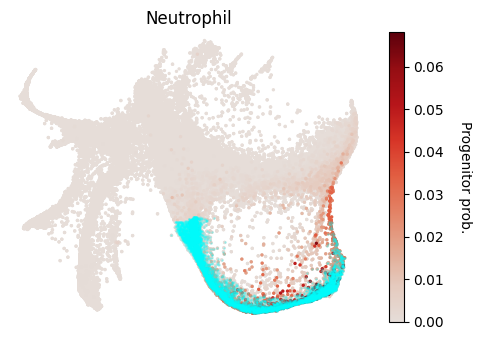

In [3]:
cs.tl.fate_map(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=True,
)
cs.pl.fate_map(
    adata,
    selected_fates=["Neutrophil"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

In [6]:
cs.tl.fate_bias(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    pseudo_count=0,
    sum_fate_prob_thresh=0.1,
)

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_bias_transition_map_Neutrophil*Monocyte']


/home/users/kzlin/miniconda3/envs/cospar/lib/python3.9/site-packages/cospar/tool/_utils.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_annote[cell_id_t2] == yy


In [5]:
adata

AnnData object with n_obs × n_vars = 41093 × 2000
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'Time point', 'clone_id', 'n_genes', 'fate_map_transition_map_Neutrophil', 'fate_map_transition_map_Monocyte', 'fate_bias_transition_map_Neutrophil*Monocyte'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'clonal_time_points', 'data_des', 'hvg', 'intraclone_transition_map', 'log1p', 'neighbors', 'pca', 'sp_idx', 'time_ordering', 'transition_map', 'available_map', 'fate_map_params', 'fate_potency_tmp', 'fate_bias_params'
    obsm: 'X_clone', 'X_emb', 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [12]:
adata.obs['fate_map_transition_map_Neutrophil']

d6_2_2:GCGTGCAAAGAAGTTA        0.000000
d6_2_2:AAGGGACCCTCGATGC        0.000000
d6_2_2:CGTACCGAAGCGCCTT        0.000000
d6_2_2:CCGTAGCTAGGCAGTT        0.000000
d6_2_2:TAGGCTTTCGTGGATA        0.001016
                                 ...   
LSK_d6_1_3:CTGTGACCTGCTATTT    0.000000
LSK_d6_1_3:AGGCGTTTCCTATTCA    0.000000
LSK_d6_1_3:CGTGCAACTGGCCTGT    0.000000
LSK_d6_1_3:CCCTTGCAAGTGAAAG    0.000000
LSK_d6_1_3:TCCGCTGTGACAGATA    0.000000
Name: fate_map_transition_map_Neutrophil, Length: 41093, dtype: float64